<img src="Fondo_LML.png" alt="Descripción gráfica de los autoencoders" title="Autoencoders" />



# <font color = "#0C78E8"> Contruyendo Autoencoders con Keras </font>

<font color = "#4c4747"> Dora Suárez </font>

En este tutorial aprenderemos cómo construir autoencoders básicos con keras. Para ello veremos:

-	Breve descripción de los autoencoders
-	Un autoencoder simple basado en una red neuronal densa (Completamente conectada)
-	Una aplicación de los autoencoders para la eliminación de ruido en imágenes

“Autoencoding” es un algoritmo de compresión de datos en donde cada una de las funciones de compresión y descompresión son específicas del conjunto de datos lo que implica que solo se pueden comprimir datos que sean similares a los que se usaron para el entrenamiento. Por ejemplo, si un autoencoder aprende a partir de imágenes de perros, será inútil para comprimir datos de plantas, por ejemplo. 
Por otro lado, los autoencoders admiten pérdida de información lo que significa que la reconstrucción de la imagen se verá más degradada en comparación a la imagen original. Para poder construir un autoencoder van a ser necesarias tres cosas básicamente 

-	Una función de codificación
-	Una función de decodificación 
-	Una función de distancia entre la cantidad de perdida de información de la imagen original y su reconstrucción 

Los autoencoders en general no son buenos para la compresión de imágenes, de hecho es difícil entrenar autoencoders para que realicen trabajos mejores que los que ya realizan algoritmos como los de JPEG que son aplicados para cualquier imagen y no solo para un conjunto de características para las que es entrenado. 
Las aplicaciones practicas mas importantes son las de eliminación de ruido y reducción de dimensionalidad para la visualización de datos. El hecho de que utilicen funciones no lineales para hacer la reducción de dimensionalidad hace de los autoencoders mas atractivos para muchas aplicaciones como por ejemplo procesamiento de lenguaje natural.
Algunas técnicas de visualización en dos dimensiones funcionan mejor en datos con dimensiones bajas, así que usan como un preprocesamiento los autoencoders para poder tener un espacio de una dimensión reducida.

<img src="Autoencoders.png" alt="Descripción gráfica de los autoencoders" title="Autoencoders" />


# <font color = "#0C78E8"> El autoencoder más simple de todos </font>

El autoencoder más simple tiene una única capa neuronal que está totalmente conectada como codificador y decodificador, para nuestro ejemplo trabajaremos con el conjunto de datos MNIST, el objetivo es codificar y decodificar algunos dígitos y evaluar como se comporta la funcion de perdida con esta aplicacion simple.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


Creamos los elementos de entrada, la cantidad de nodos que queremos que tenga nuestra representación y el __[tensor](https://www.tensorflow.org/api_docs/python/tf/Tensor)__ que va a preparar el calculo de la red neuronal.

In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))

In [3]:
print(input_img)

Tensor("input_1:0", shape=(?, 784), dtype=float32)


In [4]:
encoded = Dense(encoding_dim, activation='relu')(input_img) 
decoded = Dense(784, activation='relu')(encoded)

Modelos para las codificaciones:

In [5]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

Modelo de decodificador:

In [6]:
encoded_input = Input(shape=(encoding_dim,)) # Entrada codificada, de 32 dimensiones 
decoder_layer = autoencoder.layers[-1] # Traemos la última capa del modelo 
decoder = Model(encoded_input, decoder_layer(encoded_input)) # Creamos el modelo decodificado

Ahora vamos a entrenar nuestro autoencoder para reconstruir los dígitos MNIST

En primer lugar, vamos a seleccionar función de __[perdida](https://keras.io/losses/)__ perdida y el __[optimizador](https://keras.io/optimizers/)__ 

In [7]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error') # Configura el modelo para el entrenamiento, se puede seleccionar el optimizador, la funcion de pérdida, la métricas, tensores objetivo, etc.

Ahora preparemos nuestros datos de entrada, en este caso no vamos a necesitar las etiquetas ya que solo queremos codificar/decodificar las imágenes de entrada del modelo. 

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [11]:
print(x_train[1])

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

In [12]:
len(x_train)

60000

In [13]:
x_train.shape[1:]

(28, 28)

In [14]:
np.prod(x_test.shape[1:])

784

In [15]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [16]:
print(x_train[1])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.0774 - val_loss: 0.0692
Epoch 2/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.0636 - val_loss: 0.0580
Epoch 3/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.0543 - val_loss: 0.0508
Epoch 4/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.0484 - val_loss: 0.0460
Epoch 5/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.0444 - val_loss: 0.0426
Epoch 6/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.0413 - val_loss: 0.0396
Epoch 7/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.0387 - val_loss: 0.0373
Epoch 8/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.0364 - val_loss: 0.0349
Epoch 9/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.0344 - val_loss: 0.0334
Epoch

Despues de 50 iteraciones, el autoencoder parece alcanzar un valor de perdida estable. Podemos intentar ver las entradas reconstruidas y las representaciones recontruidas. Por la métrica se muestra el valor de la perdida por defecto

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

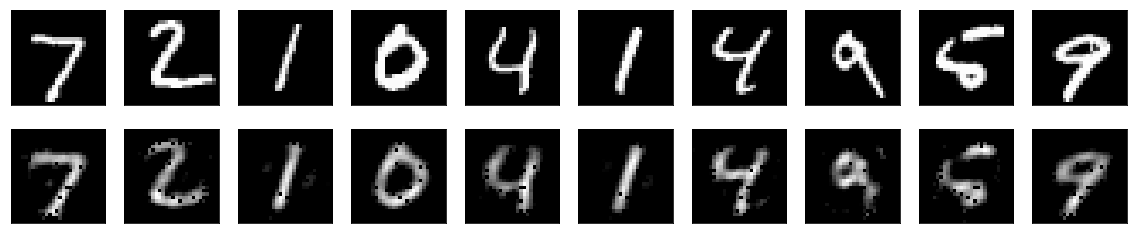

In [20]:
import matplotlib.pyplot as plt

n = 10  # Cuántos dígitos queremos codificar
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# <font color = "#0C78E8"> Autoencoder para la eliminación de Ruido </font>

Cuando hay más nodos en la capa oculta que entradas, la red se arriesga a aprender la llamada "Función de identidad", también llamada "Función nula", lo que significa que la salida es igual a la entrada, lo que hace que el Autoencoder sea inútil. 

Los Autoencoders de Denoising resuelven este problema al corromper los datos a propósito al convertir aleatoriamente algunos de los valores de entrada a cero. En general, el porcentaje de nodos de entrada que se establece en cero es de aproximadamente 50%. Otras fuentes sugieren un recuento menor, como el 30%. Depende de la cantidad de datos y nodos de entrada que tenga.

<img src="denoising.png" alt="Descripción gráfica de los autoencoders" title="Autoencoders" />



In [21]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

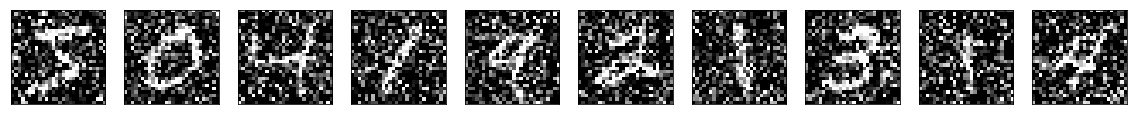

In [22]:
n = 10  # Cuántos dígitos queremos graficar
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [24]:
encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)

In [25]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1] 
decoder = Model(encoded_input, decoder_layer(encoded_input)) 
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error') 

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1077 - val_loss: 0.0695
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0688 - val_loss: 0.0687
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0683 - val_loss: 0.0682
Epoch 4/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0677 - val_loss: 0.0676
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0670 - val_loss: 0.0667
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0660 - val_loss: 0.0655
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0646 - val_loss: 0.0638
Epoch 8/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0628 - val_loss: 0.0618
Epoch 9/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0607 - val_loss: 0.0596
Epoch

In [27]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


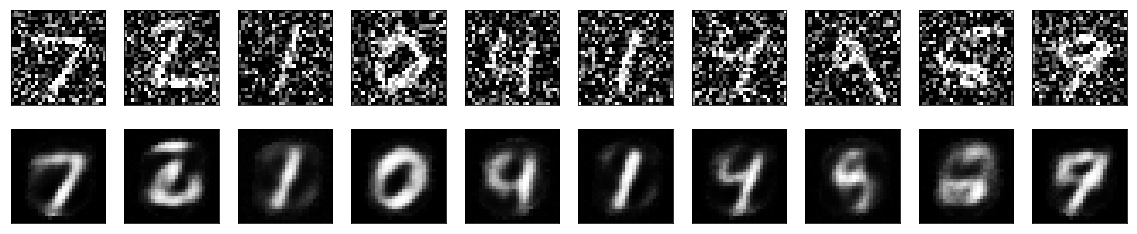

In [28]:
import matplotlib.pyplot as plt

n = 10  # Cuántos dígitos queremos codificar
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# <font color = "#0C78E8"> Ejercicio</font>

- Haga un autoencoder modificando el optimizador en tu tasa de aprendizaje, decadencia y momento:

`sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(loss='mean_squared_error', optimizer=sgd)`

Compare el desempeño (en términos de la representación y cantidad de "epochs" necesarios hasta obtener un punto en que la función de pérdida no varie demasiado. SI quiere saber más de los optimizadores le recomiendo el __[siguiente blog](http://ruder.io/optimizing-gradient-descent/)__


- Modificaciones sobre la función de pérdida

Utilice funciones de pérdida diferentes al error cuadratico medio, ¿observa diferencias en la reconstrucción?




# <font color = "#0C78E8"> Un rato de dispersión</font>

¿Una mejor idea de que hace la tasa de aprendizaje?

__[playground.tensorflow.org](playground.tensorflow.org)__

¿Un gif?

__[Hagamos un gif](https://experiments.withgoogle.com/collection/ai/move-mirror/view/mirror)__

Visor de reducción de dimensionalidad

__[reducción](http://projector.tensorflow.org/)__

Dibujitos... Yaaaaaaaay!!!

__[Dibujitos](https://quickdraw.withgoogle.com/)__

Musiquita... Yaaaaaaaaaay!!!

__[Musica](https://musiclab.chromeexperiments.com/Song-Maker/)__

